In [69]:
import numpy as np
from scipy.stats import norm, rv_continuous, entropy, skewnorm
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.rcParams["font.family"] = "Times New Roman"

In [70]:
mu, sigma = 0.0, np.sqrt(1)

def normal_pdf(x, mu, sigma):
    normal_pdf = np.exp(-(x - mu)**2 / (2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return normal_pdf

x_double = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
_normal = normal_pdf(x_double, mu, sigma) * 0.5
double_gaussian = np.append(_normal, _normal) 

x_single = np.linspace(mu - 6*sigma, mu + 6*sigma, 2000)
single_gaussian = normal_pdf(x_single, mu, sigma)

In [98]:
area_s = np.trapz(single_gaussian, x_single, dx=1)
print("Area under curve single gaussian: {area}".format(area=area_s))
area_d = np.trapz(double_gaussian, x_single, dx=1)
print("Area under curve double gaussian: {area}".format(area=area_d))

Area under curve single gaussian: 0.9999999980266059
Area under curve double gaussian: 0.9968145266885469


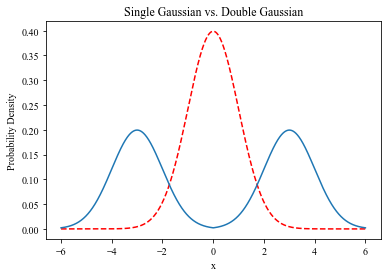

In [92]:
plt.plot(x_single, single_gaussian, 'r--')
plt.plot(x_single, double_gaussian)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title("Single Gaussian vs. Double Gaussian")
plt.show()

In [94]:
p = single_gaussian; q = double_gaussian
m = len(single_gaussian)
DKL = 0.0
for x_i in range(0, m):
    dlv = p[x_i] * np.log(p[x_i] / q[x_i])
    DKL += dlv
print("DKL convergence with single vs. double gaussian: {dkl_c}".format(dkl_c=round(DKL, 3)))

DKL convergence with single vs. double gaussian: 467.334


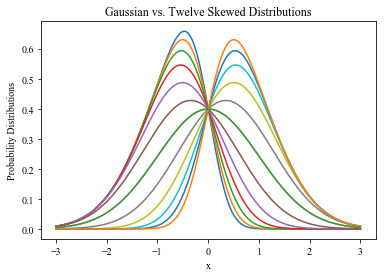

In [100]:
mu, sigma = 0.0, np.sqrt(1)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
p = normal_pdf(x, mu, sigma)

def DKL_skews():
    m = len(normal); skews = np.arange(-3, 3, 0.1)
    DKL_skews = []
    for skew in skews:
        DKL = 0.0
        rv = skewnorm(skew)
        q = rv.pdf(x)
        for x_i in range(0, m):
            dlv = p[x_i] * np.log(p[x_i] / q[x_i])
            DKL += dlv
        DKL_skews.append(DKL)
    return DKL_skews
        
for sk in np.arange(-3, 3, 0.5):
    rv = skewnorm(sk)
    skewed = rv.pdf(x)
    plt.plot(x, skewed)
plt.plot(x, normal)
plt.title("Gaussian vs. Twelve Skewed Distributions")
plt.xlabel("x")
plt.ylabel("Probability Distributions")
plt.show()

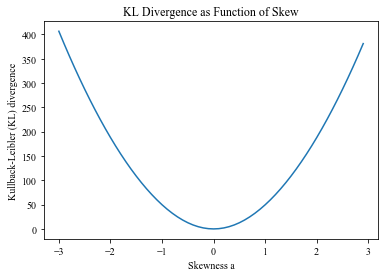

In [106]:
xticks = np.arange(-3, 3, 6/60)
plt.plot(xticks, DKL_skews())
plt.xlabel("Skewness a")
plt.ylabel("Kullback-Leibler (KL) divergence")
plt.title("KL Divergence as Function of Skew")
plt.show()

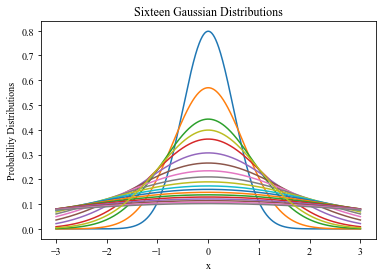

In [138]:
import warnings
warnings.filterwarnings("ignore")

def DKL_sd():
    m = len(normal); sds = np.arange(0.5, 4, 0.2)
    DKL_sd = []
    for sigma in sds:
        DKL = 0.0
        q = normal_pdf(x, mu, sigma)
        for x_i in range(0, m):
            dlv = p[x_i] * np.log(p[x_i] / q[x_i])
            DKL += dlv
        DKL_sd.append(DKL)
    return DKL_sd


for sigma in np.arange(0.5, 4, 0.2):
    sd_plt = normal_pdf(x, mu, sigma)
    plt.plot(x, sd_plt)
plt.plot(x, normal)
plt.title("Sixteen Gaussian Distributions")
plt.xlabel("x")
plt.ylabel("Probability Distributions")
plt.show()

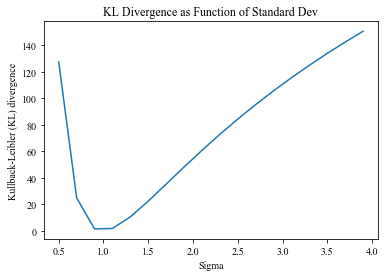

In [139]:
xticks = np.arange(0.5, 4, 0.2)
plt.plot(xticks, DKL_sd())
plt.xlabel("Sigma")
plt.ylabel("Kullback-Leibler (KL) divergence")
plt.title("KL Divergence as Function of Standard Dev")
plt.show()